In [22]:
import pulp
import numpy as np

# Wind energy production data
wind_data = [3.2, 2.9, 2.7, 2.8, 2.9, 3.1, 3.4, 3.9, 4.2, 4.3, 4.2, 4.1, 4.0, 3.8, 3.6, 3.3, 3.1, 2.9, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1]
# wind_data = np.ones(24)*4
prices_day = [20, 25, 30, 35, 40, 45, 50, 60, 70, 75, 80, 85, 90, 95, 100, 90, 80, 70, 60, 50, 40, 35, 30, 25]
prices_bal = [150, 130, 110, 90, 80, 70, 60, 50, 40, 35, 30, 25, 20, 15, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Battery capacity (MWh)
battery_capacity = 50

# Battery state of charge constraints
soc_min = 0.1 * battery_capacity
soc_max = 0.9 * battery_capacity

# Create problem instance
problem = pulp.LpProblem("Wind farm revenue maximization", pulp.LpMaximize)

# Define decision variables
E_bal = pulp.LpVariable.dict("E_bal", range(24), lowBound=0, cat=pulp.LpContinuous)
E_day = pulp.LpVariable.dict("E_day", range(24), lowBound=0, cat=pulp.LpContinuous)
SOC = pulp.LpVariable.dict("SOC", range(25), lowBound=0, upBound=battery_capacity, cat=pulp.LpContinuous)

# Objective function
revenue = sum(prices_day[t]*E_day[t] + prices_bal[t]*E_bal[t] for t in range(24))
problem += revenue

# Wind power production constraint
for t in range(24):
    problem += E_day[t] + E_bal[t] <= wind_data[t] + SOC[t], f"Wind power production constraint at hour {t}"

# State of charge constraint
SOC[0] = soc_min  # initial state of charge
for t in range(1, 25):
    problem += SOC[t-1] + 0.95*(wind_data[t-1] - E_bal[t-1] - E_day[t-1]) == SOC[t], f"SOC constraint at hour {t}"
    problem += soc_min <= SOC[t], f"SOC lower bound at hour {t}"
    problem += SOC[t] <= soc_max, f"SOC upper bound at hour {t}"

# Final state of charge constraint
problem += SOC[24] == SOC[0], "Final SOC constraint"

# Solve the problem
status = problem.solve()

# Print the optimal solution
print(f"Optimal revenue: ${problem.objective.value():,.2f}")
print(f"Hour 0: E_day = 0 MWh, E_bal = 0 MWh, SOC = {SOC[0]} MWh")


batteryStateOfCharge  =  np.empty(25)
batteryStateOfCharge[0] = SOC[0]
for t in range(24):
    batteryStateOfCharge[t+1] = SOC[t+1].value()
    print(f"Hour {t+1}: E_day = {E_day[t].value():,.2f} MWh, E_bal = {E_bal[t].value():,.2f} MWh, SOC = {SOC[t+1].value():,.2f} MWh")    


Optimal revenue: $7,984.00
Hour 0: E_day = 0 MWh, E_bal = 0 MWh, SOC = 5.0 MWh
Hour 1: E_day = 0.00 MWh, E_bal = 3.20 MWh, SOC = 5.00 MWh
Hour 2: E_day = 0.00 MWh, E_bal = 2.90 MWh, SOC = 5.00 MWh
Hour 3: E_day = 0.00 MWh, E_bal = 2.70 MWh, SOC = 5.00 MWh
Hour 4: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 7.66 MWh
Hour 5: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 10.41 MWh
Hour 6: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 13.36 MWh
Hour 7: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 16.59 MWh
Hour 8: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 20.30 MWh
Hour 9: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 24.29 MWh
Hour 10: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 28.37 MWh
Hour 11: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 32.36 MWh
Hour 12: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 36.26 MWh
Hour 13: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 40.05 MWh
Hour 14: E_day = 0.00 MWh, E_bal = 0.00 MWh, SOC = 43.66 MWh
Hour 15: E_day = 44.30 MWh, E_bal = 0.00 MWh, SOC = 5.00 MWh
Hour 16: E_day = 0.

c:\Users\raiya\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


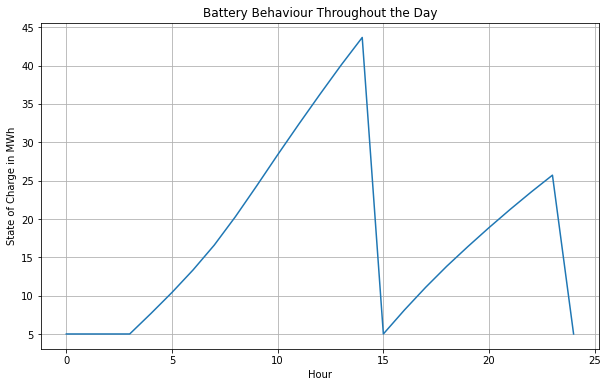

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of x-axis values for the time series data
x = list(range(len(batteryStateOfCharge)))

# create a line chart with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=batteryStateOfCharge)

# set the title and axis labels
plt.title('Battery Behaviour Throughout the Day')
plt.xlabel('Hour')
plt.ylabel('State of Charge in MWh')

# add gridlines to the chart
plt.grid()

# show the chart
plt.show()


Real Example: 2019 Jan 1st

In [ ]:
import pulp
import numpy as np

# Wind energy production data
wind_data = [82222.464,
71909.45,
67657.565,
69458.625,
69803.901,
62120.425,
58560.925,
54939.715,
54254.401,
53450.717,
56082.691,
62096.533,
65803.969,
66341.081,
71118.907,
80767.395,
89001.678,
92351.652,
93118.299,
94374.85,
94848.868,
94399.96,
89997.365,
89361.664
]
wind_data /= 1000
prices_day = [ 46.60, 
 41.33, 
 42.18, 
 44.37, 
 37.67, 
 39.70, 
 40.59, 
 43.26, 
 49.44, 
 49.46, 
 49.27, 
 48.89, 
 48.45, 
 48.74, 
 49.06, 
 49.56, 
 50.28, 
 50.92, 
 49.42, 
 48.72, 
 48.28, 
 47.61, 
 47.23, 
 46.74 
]
prices_bal = [ 46.60, 
 41.33, 
 42.18, 
 44.37, 
 37.67, 
 39.70, 
 40.59, 
 43.26, 
 49.44, 
 49.46, 
 49.27, 
 48.89, 
 48.45, 
 48.74, 
 49.06, 
 49.56, 
 50.28, 
 50.92,
 49.42, 
 48.72, 
 48.28, 
 47.61, 
 47.23, 
 46.74 
]

# Battery capacity (MWh)
battery_capacity = 50

# Battery state of charge constraints
soc_min = 0.1 * battery_capacity
soc_max = 0.9 * battery_capacity

# Create problem instance
problem = pulp.LpProblem("Wind farm revenue maximization", pulp.LpMaximize)

# Define decision variables
E_bal = pulp.LpVariable.dict("E_bal", range(24), lowBound=0, cat=pulp.LpContinuous)
E_day = pulp.LpVariable.dict("E_day", range(24), lowBound=0, cat=pulp.LpContinuous)
SOC = pulp.LpVariable.dict("SOC", range(25), lowBound=0, upBound=battery_capacity, cat=pulp.LpContinuous)

# Objective function
revenue = sum(prices_day[t]*E_day[t] + prices_bal[t]*E_bal[t] for t in range(24))
problem += revenue

# Wind power production constraint
for t in range(24):
    problem += E_day[t] + E_bal[t] <= wind_data[t] + SOC[t], f"Wind power production constraint at hour {t}"

# State of charge constraint
SOC[0] = soc_min  # initial state of charge
for t in range(1, 25):
    problem += SOC[t-1] + 0.95*(wind_data[t-1] - E_bal[t-1] - E_day[t-1]) == SOC[t], f"SOC constraint at hour {t}"
    problem += soc_min <= SOC[t], f"SOC lower bound at hour {t}"
    problem += SOC[t] <= soc_max, f"SOC upper bound at hour {t}"

# Final state of charge constraint
problem += SOC[24] == SOC[0], "Final SOC constraint"

# Solve the problem
status = problem.solve()

# Print the optimal solution
print(f"Optimal revenue: ${problem.objective.value():,.2f}")
print(f"Hour 0: E_day = 0 MWh, E_bal = 0 MWh, SOC = {SOC[0]} MWh")


batteryStateOfCharge  =  np.empty(25)
batteryStateOfCharge[0] = SOC[0]
for t in range(24):
    batteryStateOfCharge[t+1] = SOC[t+1].value()
    print(f"Hour {t+1}: E_day = {E_day[t].value():,.2f} MWh, E_bal = {E_bal[t].value():,.2f} MWh, SOC = {SOC[t+1].value():,.2f} MWh")    


In [ ]:
#look into capacity in terms of MW, has to do with the dynamics of pipes/water flow rate/ 
# use real life data